In [8]:
import os
import io
from google.cloud import vision
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
# Authenticate user
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="gleaming-store-318714-fa3a393f498e.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [57]:
path = './images/taj_mahal.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [58]:
response = client.face_detection(image=image)
faces = response.face_annotations

# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                   'LIKELY', 'VERY_LIKELY')

In [54]:
for face in faces:
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

In [55]:
# Read image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw 
start_point = (579, 111)
end_point = (1497, 1179)

# Blue color in RGB
color = (0, 255, 0)
  
# Line thickness of 2 px
thickness = 2
image = cv2.rectangle(image, start_point, end_point, color, thickness)

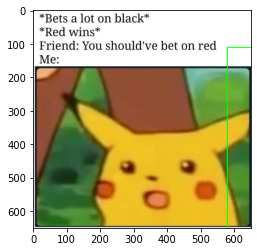

In [56]:
plt.imshow(image)